[View in Colaboratory](https://colab.research.google.com/github/iiwakuralain/TCC2/blob/master/linear_si.ipynb)

In [0]:
import pandas as pd
import numpy as np # para álgebra linear
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


In [14]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving db.csv to db (5).csv
User uploaded file "db.csv" with length 10112 bytes


In [0]:
df = pd.read_csv('db.csv')

In [0]:

#Busca apenas a cidade joinville (no caso é a cidade n.1) 
cidade = df.loc[(df['cidade']==1)].astype('int64')
#cidade = df.astype('int64')

In [0]:
#define os inputs (uso apenas a coluna m2Aprox, o restante dropa)
X = cidade.drop(['cidade','3mm','4mm','$3mm','$4mm'], axis = 1)
#target de predição, preço final 3mm
y = cidade['3mm']

In [0]:
#Divido em trino e teste.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [0]:
from sklearn.linear_model import LinearRegression
# Create linear regression
regr = LinearRegression()

In [23]:
lreg = regr.fit(X_train, y_train)
lreg.intercept_

369.35329298531724

In [24]:
lreg.coef_

array([255.67443763])

In [0]:
pred = regr.predict(X_test)

In [26]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, pred)

3316.9627254582983

In [30]:
print 'Média do erro absoluto: ', np.absolute((pred - y_test)).mean()
print 'Média do erro relativo: ', np.absolute(((pred - y_test) / y_test)).mean()

Média do erro absoluto:  3316.9627254582983
Média do erro relativo:  0.06766207896475561


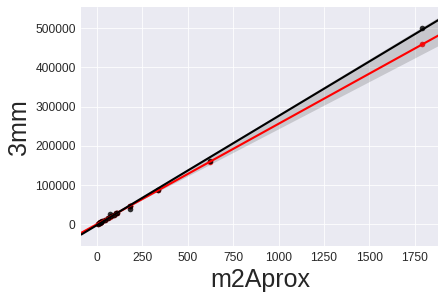

In [31]:
import seaborn as sns
sns.set()

# Set context to `"paper"`
sns.set_context("paper", font_scale=1.5, rc={"font.size":5,"axes.labelsize":25})
    
sns.regplot(x=X_test['m2Aprox'], y=pred,color='red');
sns.regplot(x=X_test['m2Aprox'], y=y_test, color='black');